In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [19]:

data = pd.read_csv('Dataset.csv')


In [20]:
data.head(-5)

Unnamed: 0       Date Weather Station  Minimum Temperature  \
0                0  12/1/2008       Station 2                 13.4   
1                1  12/2/2008       Station 2                  7.4   
2                2  12/3/2008       Station 2                 12.9   
3                3  12/4/2008       Station 2                  9.2   
4                4  12/5/2008       Station 2                 17.5   
...            ...        ...             ...                  ...   
145450      145450  6/16/2017      Station 41                  5.2   
145451      145451  6/17/2017      Station 41                  6.4   
145452      145452  6/18/2017      Station 41                  8.0   
145453      145453  6/19/2017      Station 41                  7.4   
145454      145454  6/20/2017      Station 41                  3.5   

        Maximum Temperature  Rainfall  Evaporation  Sunshine Gust Trajectory  \
0                      22.9       0.6          NaN       NaN               W   
1                      25.1       0.0          NaN       NaN             WNW   
2                      25.7       0.0          NaN       NaN             WSW   
3                      28.0       0.0          NaN       NaN              NE   
4                      32.3       1.0          NaN       NaN               W   
...                     ...       ...          ...       ...             ...   
145450                 24.3       0.0          NaN       NaN               E   
145451                 23.4       0.0          NaN       NaN             ESE   
145452                 20.7       0.0          NaN       NaN             ESE   
145453                 20.6       0.0          NaN       NaN               E   
145454                 21.8       0.0          NaN       NaN               E   

        Air Velocity  ... Moisture Level at 9 AM Moisture Level at 3 PM  \
0               44.0  ...                   71.0                   22.0   
1               44.0  ...                   44.0                   25.0   
2               46.0  ...                   38.0                   30.0   
3               24.0  ...                   45.0                   16.0   
4               41.0  ...                   82.0                   33.0   
...              ...  ...                    ...                    ...   
145450          24.0  ...                   53.0                   24.0   
145451          31.0  ...                   53.0                   25.0   
145452          41.0  ...                   56.0                   32.0   
145453          35.0  ...                   63.0                   33.0   
145454          31.0  ...                   59.0                   27.0   

        Atmospheric Pressure at 9 AM  Atmospheric Pressure at 3 PM  \
0                             1007.7                        1007.1   
1                             1010.6                        1007.8   
2                             1007.6                        1008.7   
3                             1017.6                        1012.8   
4                             1010.8                        1006.0   
...                              ...                           ...   
145450                        1023.8                        1020.0   
145451                        1025.8                        1023.0   
145452                        1028.1                        1024.3   
145453                        1027.2                        1023.3   
145454                        1024.7                        1021.2   

        Cloudiness at 9 AM  Cloudiness at 3 PM  Recorded Temperature at 9 AM  \
0                      8.0                 NaN                          16.9   
1                      NaN                 NaN                          17.2   
2                      NaN                 2.0                          21.0   
3                      NaN                 NaN                          18.1   
4                      7.0                 8.0                  

In [21]:
data.describe()

Unnamed: 0  Minimum Temperature  Maximum Temperature       Rainfall  \
count  145460.000000        143975.000000        144199.000000  142199.000000   
mean    72729.500000            12.194034            23.221348       2.360918   
std     41990.829415             6.398495             7.119049       8.478060   
min         0.000000            -8.500000            -4.800000       0.000000   
25%     36364.750000             7.600000            17.900000       0.000000   
50%     72729.500000            12.000000            22.600000       0.000000   
75%    109094.250000            16.900000            28.200000       0.800000   
max    145459.000000            33.900000            48.100000     371.000000   

        Evaporation      Sunshine   Air Velocity  Air Velocity at  9 AM  \
count  82670.000000  75625.000000  135197.000000          143693.000000   
mean       5.468232      7.611178      40.035230              14.043426   
std        4.193704      3.785483      13.607062               8.915375   
min        0.000000      0.000000       6.000000               0.000000   
25%        2.600000      4.800000      31.000000               7.000000   
50%        4.800000      8.400000      39.000000              13.000000   
75%        7.400000     10.600000      48.000000              19.000000   
max      145.000000     14.500000     135.000000             130.000000   

       Air Velocity at  3 PM  Moisture Level at 9 AM  Moisture Level at 3 PM  \
count          142398.000000           142806.000000           140953.000000   
mean               18.662657               68.880831               51.539116   
std                 8.809800               19.029164               20.795902   
min                 0.000000                0.000000                0.000000   
25%                13.000000               57.000000               37.000000   
50%                19.000000               70.000000               52.000000   
75%                24.000000               83.000000               66.000000   
max                87.000000              100.000000              100.000000   

       Atmospheric Pressure at 9 AM  Atmospheric Pressure at 3 PM  \
count                  130395.00000                 130432.000000   
mean                     1017.64994                   1015.255889   
std                         7.10653                      7.037414   
min                       980.50000                    977.100000   
25%                      1012.90000                   1010.400000   
50%                      1017.60000                   1015.200000   
75%                      1022.40000                   1020.000000   
max                      1041.00000                   1039.600000   

       Cloudiness at 9 AM  Cloudiness at 3 PM  Recorded Temperature at 9 AM  \
count        89572.000000        86102.000000                 143693.000000   
mean             4.447461            4.509930                     16.990631   
std              2.887159            2.720357                      6.488753   
min              0.000000            0.000000                     -7.200000   
25%              1.000000            2.000000                     12.300000   
50%              5.000000            5.000000                     16.700000   
75%              7.000000            7.000000                     21.600000   
max              9.000000            9.000000                     40.200000   

       Recorded Temperature at 3 PM  
count                  141851.00000  
mean                       21.68339  
std                         6.93665  
min                        -5.40000  
25%                        16.60000  
50%                        21.10000  
75%                        26.40000  
max                        46.70000

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    145460 non-null  int64  
 1   Date                          145460 non-null  object 
 2   Weather Station               145460 non-null  object 
 3   Minimum Temperature           143975 non-null  float64
 4   Maximum Temperature           144199 non-null  float64
 5   Rainfall                      142199 non-null  float64
 6   Evaporation                   82670 non-null   float64
 7   Sunshine                      75625 non-null   float64
 8   Gust Trajectory               135134 non-null  object 
 9   Air Velocity                  135197 non-null  float64
 10  Gust Trajectory at  9 AM      134894 non-null  object 
 11  Gust Trajectory at  3 PM      141232 non-null  object 
 12  Air Velocity at  9 AM         143693 non-nul

In [23]:
# Calculate the percentage of null values in each column
null_percentages = data.isnull().sum() / len(data) * 100

null_percentages

Unnamed: 0                       0.000000
Date                             0.000000
Weather Station                  0.000000
Minimum Temperature              1.020899
Maximum Temperature              0.866905
Rainfall                         2.241853
Evaporation                     43.166506
Sunshine                        48.009762
Gust Trajectory                  7.098859
Air Velocity                     7.055548
Gust Trajectory at  9 AM         7.263853
Gust Trajectory at  3 PM         2.906641
Air Velocity at  9 AM            1.214767
Air Velocity at  3 PM            2.105046
Moisture Level at 9 AM           1.824557
Moisture Level at 3 PM           3.098446
Atmospheric Pressure at 9 AM    10.356799
Atmospheric Pressure at 3 PM    10.331363
Cloudiness at 9 AM              38.421559
Cloudiness at 3 PM              40.807095
Recorded Temperature at 9 AM     1.214767
Recorded Temperature at 3 PM     2.481094
Rain that day                    2.241853
Rain the day after               2

In [24]:
# Get the column names where the null percentage is greater than 20%
columns_to_remove = null_percentages[null_percentages > 20].index

columns_to_remove

Index(['Evaporation', 'Sunshine', 'Cloudiness at 9 AM', 'Cloudiness at 3 PM'], dtype='object')

In [25]:
# Remove the columns from the dataset
data_filtered = data.drop(columns_to_remove, axis=1)

In [26]:
data_filtered

Unnamed: 0       Date Weather Station  Minimum Temperature  \
0                0  12/1/2008       Station 2                 13.4   
1                1  12/2/2008       Station 2                  7.4   
2                2  12/3/2008       Station 2                 12.9   
3                3  12/4/2008       Station 2                  9.2   
4                4  12/5/2008       Station 2                 17.5   
...            ...        ...             ...                  ...   
145455      145455  6/21/2017      Station 41                  2.8   
145456      145456  6/22/2017      Station 41                  3.6   
145457      145457  6/23/2017      Station 41                  5.4   
145458      145458  6/24/2017      Station 41                  7.8   
145459      145459  6/25/2017      Station 41                 14.9   

        Maximum Temperature  Rainfall Gust Trajectory  Air Velocity  \
0                      22.9       0.6               W          44.0   
1                      25.1       0.0             WNW          44.0   
2                      25.7       0.0             WSW          46.0   
3                      28.0       0.0              NE          24.0   
4                      32.3       1.0               W          41.0   
...                     ...       ...             ...           ...   
145455                 23.4       0.0               E          31.0   
145456                 25.3       0.0             NNW          22.0   
145457                 26.9       0.0               N          37.0   
145458                 27.0       0.0              SE          28.0   
145459                  NaN       0.0             NaN           NaN   

       Gust Trajectory at  9 AM Gust Trajectory at  3 PM  \
0                             W                      WNW   
1                           NNW                      WSW   
2                             W                      WSW   
3                            SE                        E   
4                           ENE                       NW   
...                         ...                      ...   
145455                       SE                      ENE   
145456                       SE                        N   
145457                       SE                      WNW   
145458                      SSE                        N   
145459                      ESE                      ESE   

        Air Velocity at  9 AM  Air Velocity at  3 PM  Moisture Level at 9 AM  \
0                        20.0                   24.0                    71.0   
1                         4.0                   22.0                    44.0   
2                        19.0                   26.0                    38.0   
3                        11.0                    9.0                    45.0   
4                         7.0                   20.0                    82.0   
...                       ...                    ...                     ...   
145455                   13.0                   11.0                    51.0   
145456                   13.0                    9.0                    56.0   
145457                    9.0                    9.0                    53.0   
145458                   13.0                    7.0                    51.0   
145459                   17.0                   17.0                    62.0   

        Moisture Level at 3 PM  Atmospheric Pressure at 9 AM  \
0                         22.0                        1007.7   
1                         25.0                        1010.6   
2                         30.0                        1007.6   
3                         16.0                        1017.6   
4                         33.0                        1010.8   
...                        ...                           ...   
145455                    24.0                        1024.6   
145456                    21.0                        1023.5   
145457                    24.0                        10

In [27]:
df = data_filtered.drop(["Unnamed: 0","Date"], axis=1)

In [28]:
df.isnull().sum() / len(data) * 100

Weather Station                  0.000000
Minimum Temperature              1.020899
Maximum Temperature              0.866905
Rainfall                         2.241853
Gust Trajectory                  7.098859
Air Velocity                     7.055548
Gust Trajectory at  9 AM         7.263853
Gust Trajectory at  3 PM         2.906641
Air Velocity at  9 AM            1.214767
Air Velocity at  3 PM            2.105046
Moisture Level at 9 AM           1.824557
Moisture Level at 3 PM           3.098446
Atmospheric Pressure at 9 AM    10.356799
Atmospheric Pressure at 3 PM    10.331363
Recorded Temperature at 9 AM     1.214767
Recorded Temperature at 3 PM     2.481094
Rain that day                    2.241853
Rain the day after               2.245978
dtype: float64

In [29]:
df = df.dropna()

In [30]:
df.isnull().sum() / len(data) * 100

Weather Station                 0.0
Minimum Temperature             0.0
Maximum Temperature             0.0
Rainfall                        0.0
Gust Trajectory                 0.0
Air Velocity                    0.0
Gust Trajectory at  9 AM        0.0
Gust Trajectory at  3 PM        0.0
Air Velocity at  9 AM           0.0
Air Velocity at  3 PM           0.0
Moisture Level at 9 AM          0.0
Moisture Level at 3 PM          0.0
Atmospheric Pressure at 9 AM    0.0
Atmospheric Pressure at 3 PM    0.0
Recorded Temperature at 9 AM    0.0
Recorded Temperature at 3 PM    0.0
Rain that day                   0.0
Rain the day after              0.0
dtype: float64

In [31]:
df2=df.reset_index()

In [32]:
df2=df2.drop("index",axis=1)

In [33]:
df2

Weather Station  Minimum Temperature  Maximum Temperature  Rainfall  \
0            Station 2                 13.4                 22.9       0.6   
1            Station 2                  7.4                 25.1       0.0   
2            Station 2                 12.9                 25.7       0.0   
3            Station 2                  9.2                 28.0       0.0   
4            Station 2                 17.5                 32.3       1.0   
...                ...                  ...                  ...       ...   
112920      Station 41                  3.5                 21.8       0.0   
112921      Station 41                  2.8                 23.4       0.0   
112922      Station 41                  3.6                 25.3       0.0   
112923      Station 41                  5.4                 26.9       0.0   
112924      Station 41                  7.8                 27.0       0.0   

       Gust Trajectory  Air Velocity Gust Trajectory at  9 AM  \
0                    W          44.0                        W   
1                  WNW          44.0                      NNW   
2                  WSW          46.0                        W   
3                   NE          24.0                       SE   
4                    W          41.0                      ENE   
...                ...           ...                      ...   
112920               E          31.0                      ESE   
112921               E          31.0                       SE   
112922             NNW          22.0                       SE   
112923               N          37.0                       SE   
112924              SE          28.0                      SSE   

       Gust Trajectory at  3 PM  Air Velocity at  9 AM  Air Velocity at  3 PM  \
0                           WNW                   20.0                   24.0   
1                           WSW                    4.0                   22.0   
2                           WSW                   19.0                   26.0   
3                             E                   11.0                    9.0   
4                            NW                    7.0                   20.0   
...                         ...                    ...                    ...   
112920                        E                   15.0                   13.0   
112921                      ENE                   13.0                   11.0   
112922                        N                   13.0                    9.0   
112923                      WNW                    9.0                    9.0   
112924                        N                   13.0                    7.0   

        Moisture Level at 9 AM  Moisture Level at 3 PM  \
0                         71.0                    22.0   
1                         44.0                    25.0   
2                         38.0                    30.0   
3                         45.0                    16.0   
4                         82.0                    33.0   
...                        ...                     ...   
112920                    59.0                    27.0   
112921                    51.0                    24.0   
112922                    56.0                    21.0   
112923                    53.0                    24.0   
112924                    51.0                    24.0   

        Atmospheric Pressure at 9 AM  Atmospheric Pressure at 3 PM  \
0                             1007.7                        1007.1   
1                             1010.6                        1007.8   
2                             1007.6                        1008.7   
3                             1017.6                        1012.8   
4                             1010.8                        1006.0   
...                              ...                           ...   
112920                        1024.7                        1021.2   
112921                        1024.6                       

In [34]:

df_3 = df2.replace(['No', 'Yes'],
                 [0, 1])

In [35]:
df_4=df_3
# ستون اسمی
categorical_column = df_4['Gust Trajectory']

# تبدیل به عدد با استفاده از Label Encoding
label_encoder = LabelEncoder()
encoded_column = label_encoder.fit_transform(categorical_column)

# جایگزینی ستون اسمی با ستون تبدیل شده
df_4['Gust Trajectory'] = encoded_column



#------------------------------------------

# ستون اسمی
categorical_column = df_4['Gust Trajectory at  3 PM']

# تبدیل به عدد با استفاده از Label Encoding
label_encoder = LabelEncoder()
encoded_column = label_encoder.fit_transform(categorical_column)

# جایگزینی ستون اسمی با ستون تبدیل شده
df_4['Gust Trajectory at  3 PM'] = encoded_column


#-----------------------------------------------
from sklearn.preprocessing import LabelEncoder

# ستون اسمی
categorical_column = df_4['Gust Trajectory at  9 AM']

# تبدیل به عدد با استفاده از Label Encoding
label_encoder = LabelEncoder()
encoded_column = label_encoder.fit_transform(categorical_column)

# جایگزینی ستون اسمی با ستون تبدیل شده
df_4['Gust Trajectory at  9 AM'] = encoded_column

#-------------------------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
pressure_values = df_4['Atmospheric Pressure at 9 AM']

# محاسبه مقادیر حداقل و حداکثر
min_value = np.min(pressure_values)
max_value = np.max(pressure_values)

# مقیاس‌بندی مین-ماکس
scaled_values = (pressure_values - min_value) / (max_value - min_value)

df_4['Atmospheric Pressure at 9 AM']=scaled_values
#------------------------------------------------


# مقادیر اولیه ستون "فشار جوی ساعت 9 صبح"
pressure_values = df_4['Atmospheric Pressure at 3 PM']

# محاسبه مقادیر حداقل و حداکثر
min_value = np.min(pressure_values)
max_value = np.max(pressure_values)

# مقیاس‌بندی مین-ماکس
scaled_values = (pressure_values - min_value) / (max_value - min_value)
df_4['Atmospheric Pressure at 3 PM']=scaled_values

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\B&E\AppData\Local\Temp\ipykernel_2040\1422037646.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_4.corr()


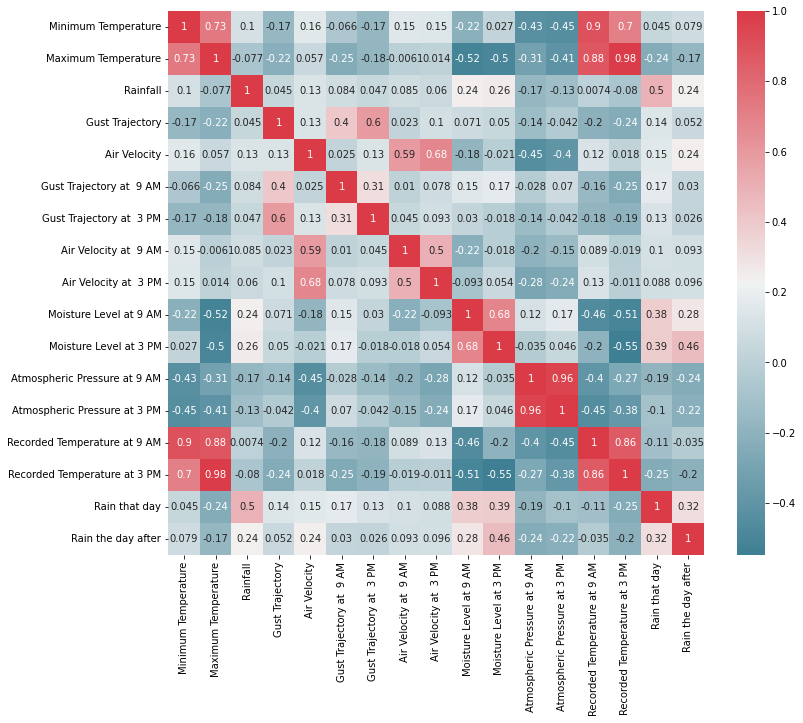

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a sample large-sized DataFrame



# Compute the correlation matrix
correlation_matrix = df_4.corr()

# Set figure size and colormap
plt.figure(figsize=(12, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap=cmap)

# Display the plot
plt.show()

In [42]:
columns = ['Minimum Temperature', 'Maximum Temperature', 'Gust Trajectory', 'Air Velocity',
           'Gust Trajectory at  9 AM', 'Gust Trajectory at  3 PM', 'Air Velocity at  9 AM',
           'Air Velocity at  3 PM', 'Moisture Level at 9 AM', 'Moisture Level at 3 PM',
           'Atmospheric Pressure at 9 AM', 'Atmospheric Pressure at 3 PM',
           'Recorded Temperature at 9 AM', 'Recorded Temperature at 3 PM']



# حذف اعضای پرت و نویز از ستون‌های مشخص شده
for column in columns:
    # محاسبه مقدار کوارتیل اول (Q1) و کوارتیل سوم (Q3)
    Q1 = np.percentile(df_4[column], 25)
    Q3 = np.percentile(df_4[column], 75)
    
    # محاسبه محدوده‌ی بازه بین کوارتیلی (IQR)
    IQR = Q3 - Q1
    
    # محاسبه حدود پایین و بالا برای تشخیص اعضای پرت
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # حذف اعضای پرت و نویز
    df_4 = df_4[(df_4[column] >= lower_bound) & (df_4[column] <= upper_bound)]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
df_4=df_4.drop("Weather Station",axis=1)

In [45]:
df_4.head(-5)

Minimum Temperature  Maximum Temperature  Rainfall  Gust Trajectory  \
0                      13.4                 22.9       0.6               13   
1                       7.4                 25.1       0.0               14   
2                      12.9                 25.7       0.0               15   
3                       9.2                 28.0       0.0                4   
4                      17.5                 32.3       1.0               13   
...                     ...                  ...       ...              ...   
112915                  2.6                 22.5       0.0                8   
112916                  5.2                 24.3       0.0                0   
112917                  6.4                 23.4       0.0                2   
112918                  8.0                 20.7       0.0                2   
112919                  7.4                 20.6       0.0                0   

        Air Velocity  Gust Trajectory at  9 AM  Gust Trajectory at  3 PM  \
0               44.0                        13                        14   
1               44.0                         6                        15   
2               46.0                        13                        15   
3               24.0                         9                         0   
4               41.0                         1                         7   
...              ...                       ...                       ...   
112915          19.0                         8                         0   
112916          24.0                         9                         0   
112917          31.0                         8                         2   
112918          41.0                         9                         0   
112919          35.0                         2                         0   

        Air Velocity at  9 AM  Air Velocity at  3 PM  Moisture Level at 9 AM  \
0                        20.0                   24.0                    71.0   
1                         4.0                   22.0                    44.0   
2                        19.0                   26.0                    38.0   
3                        11.0                    9.0                    45.0   
4                         7.0                   20.0                    82.0   
...                       ...                    ...                     ...   
112915                    9.0                    7.0                    59.0   
112916                   11.0                   11.0                    53.0   
112917                   15.0                   17.0                    53.0   
112918                   19.0                   26.0                    56.0   
112919                   15.0                   17.0                    63.0   

        Moisture Level at 3 PM  Atmospheric Pressure at 9 AM  \
0                         22.0                      0.449587   
1                         25.0                      0.497521   
2                         30.0                      0.447934   
3                         16.0                      0.613223   
4                         33.0                      0.500826   
...                        ...                           ...   
112915                    24.0                      0.735537   
112916                    24.0                      0.715702   
112917                    25.0                      0.748760   
112918                    32.0                      0.786777   
112919                    33.0                      0.771901   

        Atmospheric Pressure at 3 PM  Recorded Temperature at 9 AM  \
0                             0.4800                          16.9   
1                             0.4912                          17.2   
2                             0.5056                          21.0   
3                             0.5712                          18.1   
4                             0.4624                          17.8

In [46]:
df_4=df_4.reset_index()
df_4=df_4.drop("index",axis=1)

In [67]:
df_4.columns 

Index(['Minimum Temperature', 'Maximum Temperature', 'Rainfall',
       'Gust Trajectory', 'Air Velocity', 'Gust Trajectory at  9 AM',
       'Gust Trajectory at  3 PM', 'Air Velocity at  9 AM',
       'Air Velocity at  3 PM', 'Moisture Level at 9 AM',
       'Moisture Level at 3 PM', 'Atmospheric Pressure at 9 AM',
       'Atmospheric Pressure at 3 PM', 'Recorded Temperature at 9 AM',
       'Recorded Temperature at 3 PM', 'Rain that day', 'Rain the day after'],
      dtype='object')

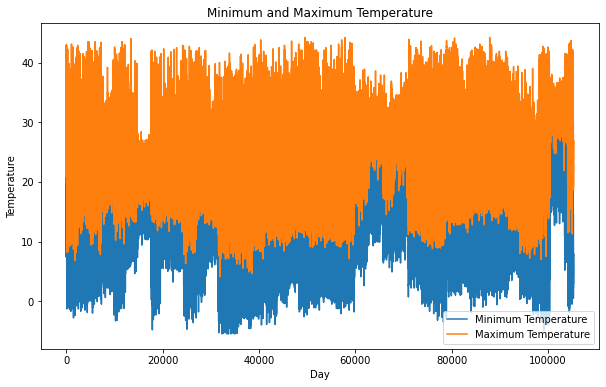

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# خواندن داده‌ها از فایل CSV
data = df_4

# نمودار دما حداقل و حداکثر
plt.figure(figsize=(10, 6))
plt.plot(data['Minimum Temperature'], label='Minimum Temperature')
plt.plot(data['Maximum Temperature'], label='Maximum Temperature')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.title('Minimum and Maximum Temperature')
plt.legend()
plt.show()






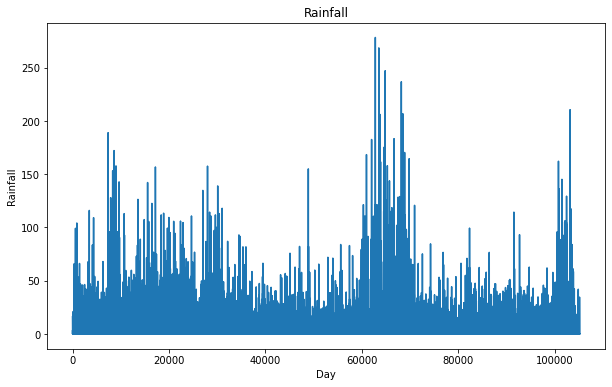

In [69]:
# نمودار بارش
plt.figure(figsize=(10, 6))
plt.plot(data['Rainfall'])
plt.xlabel('Day')
plt.ylabel('Rainfall')
plt.title('Rainfall')
plt.show()

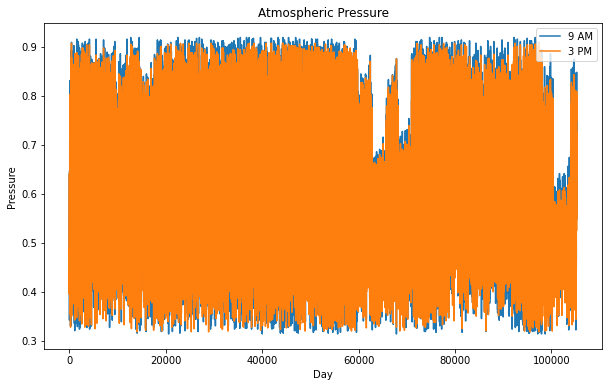

In [70]:
# نمودار تغییرات فشار جوی
plt.figure(figsize=(10, 6))
plt.plot(data['Atmospheric Pressure at 9 AM'], label='9 AM')
plt.plot(data['Atmospheric Pressure at 3 PM'], label='3 PM')
plt.xlabel('Day')
plt.ylabel('Pressure')
plt.title('Atmospheric Pressure')
plt.legend()
plt.show()

In [71]:

# تجزیه و تحلیل داده‌های آموزشی
statistics = data.describe()
print(statistics)

       Minimum Temperature  Maximum Temperature       Rainfall  \
count        105255.000000        105255.000000  105255.000000   
mean             12.583587            23.566365       2.220564   
std               6.249416             6.766396       7.960503   
min              -5.500000             4.100000       0.000000   
25%               8.000000            18.300000       0.000000   
50%              12.300000            23.100000       0.000000   
75%              17.100000            28.500000       0.600000   
max              30.700000            44.200000     278.400000   

       Gust Trajectory   Air Velocity  Gust Trajectory at  9 AM  \
count    105255.000000  105255.000000             105255.000000   
mean          7.675331      39.131367                  7.277422   
std           4.677105      11.239413                  4.561783   
min           0.000000       7.000000                  0.000000   
25%           3.000000      31.000000                  3.000000   
50%

In [54]:
X=df_4.drop("Rain the day after",axis=1)
y=df_4["Rain the day after"]

In [62]:
y.value_counts()

0    83004
1    22251
Name: Rain the day after, dtype: int64

In [57]:
from imblearn.over_sampling import RandomOverSampler

# اعمال oversampling
oversampler = RandomOverSampler(sampling_strategy=0.33)  # نسبت oversampling را تنظیم می‌کنیم
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# تعداد داده‌ها قبل و بعد از oversampling
print("before oversampling:", len(X))
print("after oversampling:", len(X_resampled))



before oversampling: 105255
after oversampling: 110395


In [63]:
y_resampled.value_counts()

0    83004
1    27391
Name: Rain the day after, dtype: int64

In [64]:
X=X_resampled
y=y_resampled

In [65]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



# تقسیم داده‌ها به دو مجموعه آموزشی و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# پیاده‌سازی مدل SVM و آموزش آن
svm_model = SVC()
svm_model.fit(X_train, y_train)

# پیاده‌سازی مدل KNN و آموزش آن
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# پیاده‌سازی مدل Decision Tree و آموزش آن
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# پیش‌بینی برچسب‌ها برای داده‌های تست
svm_predictions = svm_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)

# ارزیابی عملکرد مدل‌ها با استفاده از دقت (accuracy)
svm_accuracy = accuracy_score(y_test, svm_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# چاپ نتایج
print("Accuracy of SVM: ", svm_accuracy)
print("Accuracy of KNN: ", knn_accuracy)
print("Accuracy of Decision Tree: ", dt_accuracy)

Accuracy of SVM:  0.8320123193985235
Accuracy of KNN:  0.824176819602337
Accuracy of Decision Tree:  0.8064223923184927


In [66]:
# محاسبه معیارهای ارزیابی برای SVM

svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1_score = f1_score(y_test, svm_predictions, average='weighted')

# محاسبه معیارهای ارزیابی برای KNN

knn_precision = precision_score(y_test, knn_predictions, average='weighted')
knn_recall = recall_score(y_test, knn_predictions, average='weighted')
knn_f1_score = f1_score(y_test, knn_predictions, average='weighted')

# محاسبه معیارهای ارزیابی برای Decision Tree

dt_precision = precision_score(y_test, dt_predictions, average='weighted')
dt_recall = recall_score(y_test, dt_predictions, average='weighted')
dt_f1_score = f1_score(y_test, dt_predictions, average='weighted')

# چاپ نتایج برای SVM
print("Results for SVM:")

print("Precision: ", svm_precision)
print("Recall: ", svm_recall)
print("F1-Score: ", svm_f1_score)
print()

# چاپ نتایج برای KNN
print("Results for KNN:")

print("Precision: ", knn_precision)
print("Recall: ", knn_recall)
print("F1-Score: ", knn_f1_score)
print()

# چاپ نتایج برای Decision Tree
print("Results for Decision Tree:")

print("Precision: ", dt_precision)
print("Recall: ", dt_recall)
print("F1-Score: ", dt_f1_score)

Results for SVM:
Precision:  0.8260525785026857
Recall:  0.8320123193985235
F1-Score:  0.8132824994598478

Results for KNN:
Precision:  0.8153936222142263
Recall:  0.824176819602337
F1-Score:  0.8174991394341898

Results for Decision Tree:
Precision:  0.8131649473014936
Recall:  0.8064223923184927
F1-Score:  0.8093143012550903
